# Imports

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
%matplotlib inline

Using TensorFlow backend.


# Load data

In [2]:
X_train = pd.read_csv('./data/X_train.csv', usecols=['GAME_TIME', 'HT_SCORE_DIFF','HT_POSS'])
X_test_internal = pd.read_csv('./data/X_test_internal.csv', usecols=['GAME_TIME', 'HT_SCORE_DIFF','HT_POSS'])
X_test_external = pd.read_csv('./data/X_test_external.csv', usecols=['GAME_TIME', 'HT_SCORE_DIFF','HT_POSS'])
Y_train = pd.read_csv('./data/Y_train_binary.csv')
Y_test_internal = pd.read_csv('./data/Y_test_internal_binary.csv')
Y_test_external = pd.read_csv('./data/Y_test_external_binary.csv')

# Fit random forest model

In [3]:
rf_model = RandomForestClassifier(n_estimators=20, 
                                  min_samples_split=200, 
                                  min_samples_leaf=100, 
                                  max_features="sqrt").fit(X_train, Y_train)

/Users/henrypoole/anaconda3/envs/thesis-v2/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


# Get feature importances

In [5]:
print(rf_model.feature_importances_)

[1.46294328e-01 8.53562327e-01 1.43344636e-04]


# Make binary class and probabilistic predictions

In [6]:
# Make class predictions on internal/external test sets
Y_train_class_pred = rf_model.predict(X_train)
Y_test_internal_class_pred = rf_model.predict(X_test_internal)
Y_test_external_class_pred = rf_model.predict(X_test_external)

# Make probabilistic predictions on internal/external test sets
Y_train_prob_pred = rf_model.predict_proba(X_train)[:, 1]
Y_test_internal_prob_pred = rf_model.predict_proba(X_test_internal)[:, 1]
Y_test_external_prob_pred = rf_model.predict_proba(X_test_external)[:, 1]

# Save predictions as .csv
Y_train_pred = pd.DataFrame({'class_pred':Y_train_class_pred, 'prob_pred':Y_train_prob_pred})
Y_train_pred.to_csv('./data/rf_train_predictions.csv', index=False)

Y_test_internal_pred = pd.DataFrame({'class_pred':Y_test_internal_class_pred, 'prob_pred':Y_test_internal_prob_pred})
Y_test_internal_pred.to_csv('./data/rf_test_internal_predictions.csv', index=False)

Y_test_external_pred = pd.DataFrame({'class_pred':Y_test_external_class_pred, 'prob_pred':Y_test_external_prob_pred})
Y_test_external_pred.to_csv('./data/rf_test_external_predictions.csv', index=False)

# Evaluate results

In [7]:
# Classification reports
train_classification_report = classification_report(Y_train, Y_train_class_pred, target_names=['Away Team Win', 'Home Team Win'], digits=4)
test_internal_classification_report = classification_report(Y_test_internal, Y_test_internal_class_pred, target_names=['Away Team Win', 'Home Team Win'], digits=4)
test_external_classification_report = classification_report(Y_test_external, Y_test_external_class_pred, target_names=['Away Team Win', 'Home Team Win'], digits=4)

In [8]:
print(train_classification_report)

               precision    recall  f1-score   support

Away Team Win     0.7365    0.5793    0.6485    779434
Home Team Win     0.7617    0.8665    0.8107   1209790

     accuracy                         0.7540   1989224
    macro avg     0.7491    0.7229    0.7296   1989224
 weighted avg     0.7518    0.7540    0.7472   1989224



In [9]:
print(test_internal_classification_report)

               precision    recall  f1-score   support

Away Team Win     0.7511    0.5739    0.6507     96760
Home Team Win     0.7267    0.8562    0.7861    128011

     accuracy                         0.7347    224771
    macro avg     0.7389    0.7151    0.7184    224771
 weighted avg     0.7372    0.7347    0.7278    224771



In [10]:
print(test_external_classification_report)

               precision    recall  f1-score   support

Away Team Win     0.7479    0.5866    0.6575    104262
Home Team Win     0.7105    0.8368    0.7685    126379

     accuracy                         0.7237    230641
    macro avg     0.7292    0.7117    0.7130    230641
 weighted avg     0.7274    0.7237    0.7183    230641



In [11]:
# Calculate log loss
train_log_loss = log_loss(Y_train, Y_train_prob_pred)
test_internal_log_loss = log_loss(Y_test_internal, Y_test_internal_prob_pred)
test_external_log_loss = log_loss(Y_test_external, Y_test_external_prob_pred)

In [12]:
print(train_log_loss)

0.47015312770602885


In [13]:
print(test_internal_log_loss)

0.5065258520527249


In [14]:
print(test_external_log_loss)

0.5128424100825274


In [15]:
# Calculate area under ROC curve

def plot_roc_curve(true, pred, title):
    fpr, tpr, threshold = roc_curve(true, pred)
    roc_auc = auc(fpr, tpr)
    plt.title('{} ROC Curve'.format(title))
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

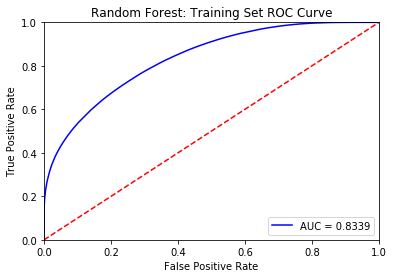

In [16]:
plot_roc_curve(Y_train, Y_train_prob_pred, 'Random Forest: Training Set')

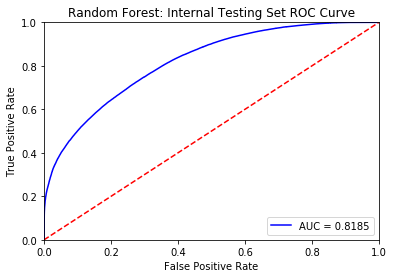

In [17]:
plot_roc_curve(Y_test_internal, Y_test_internal_prob_pred, 'Random Forest: Internal Testing Set')

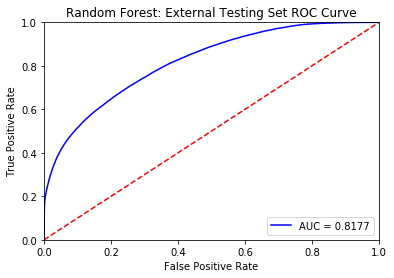

In [18]:
plot_roc_curve(Y_test_external, Y_test_external_prob_pred, 'Random Forest: External Testing Set')